## Creating triangular fuzzy number

In [1]:
! pip install Fuzzy

  Using cached Fuzzy-1.2.2.tar.gz (14 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for Fuzzy
Failed to build Fuzzy
  Running setup.py install for Fuzzy: started
  Running setup.py install for Fuzzy: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [10 lines of output]
  D:\Anaconda\lib\site-packages\setuptools\installer.py:27: SetuptoolsDeprecationWarning: setuptools.installer is deprecated. Requirements should be satisfied by a PEP 517 installer.
    warnings.warn(
  running bdist_wheel
  running build
  running build_ext
  cythoning src/fuzzy.pyx to src\fuzzy.c
  D:\Anaconda\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\user\AppData\Local\Temp\pip-install-dsvmy0x4\fuzzy_619fae44ad41401bad8b8a5195be85f3\src\fuzzy.pyx
    tree = Parsing.p_module(s, pxd, full_module_name)
  building 'fuzzy' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note

In [2]:
! pip install fuzzylab

In [3]:
import numpy as np
from matplotlib.pyplot import *
from fuzzylab import *

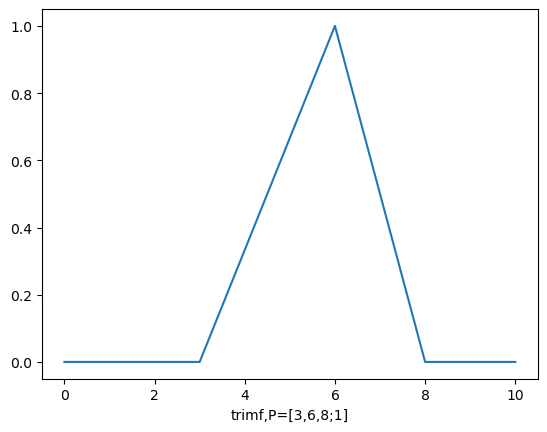

In [4]:
x=np.linspace(0,10,101)  #101 is a peak of triangular point
y=trimf(x,[3,6,8])
plot(x,y)
xlabel('trimf,P=[3,6,8;1]')
show()

## Creating trapezoidal fuzzy number

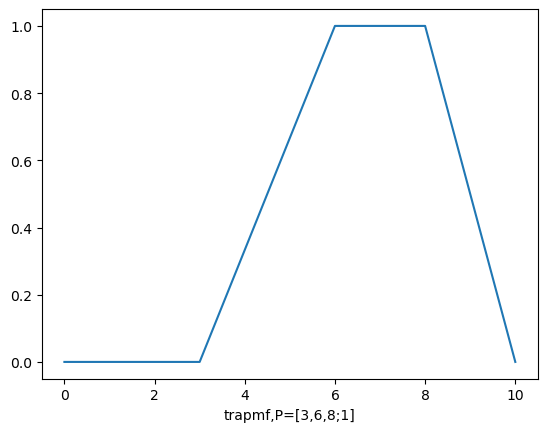

In [5]:
x=np.linspace(0,10,101)
y=trapmf(x,[3,6,8,10])
plot(x,y)
xlabel('trapmf,P=[3,6,8;1]')
show()

## Calculating Defuzzification Value

In [6]:
from matplotlib.pyplot import plot, xlabel, show
from fuzzylab import *      #linspace, trapmf, defuzz

x = np.linspace(0, 10, 101)
mf = trapmf(x,[3, 6, 8, 10])
out = defuzz(x, mf, 'centroid')
print(round(out, 4))

6.7037


In [7]:
from matplotlib.pyplot import plot, xlabel, show
from fuzzylab import *      #linspace, trapmf, defuzz

x = np.linspace(-10, 0.1, 10)
mf = trapmf(x,[-10, -8, -4, 7])
out = defuzz(x, mf, 'centroid')
print(round(out, 4))

-4.5279


## Calculating and Representing Defuzzification Outputs

###

In [8]:
! pip install scikit-fuzzy

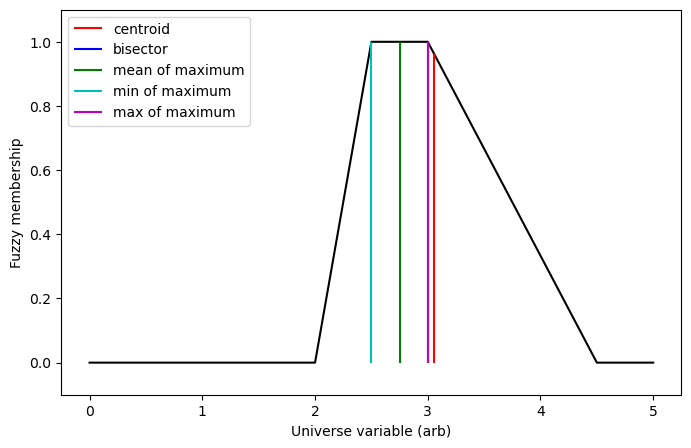

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz


# Generate trapezoidal membership function on range [0, 1]
x = np.arange(0, 5.05, 0.1)
mfx = fuzz.trapmf(x, [2, 2.5, 3, 4.5])

# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')  # Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))

plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()

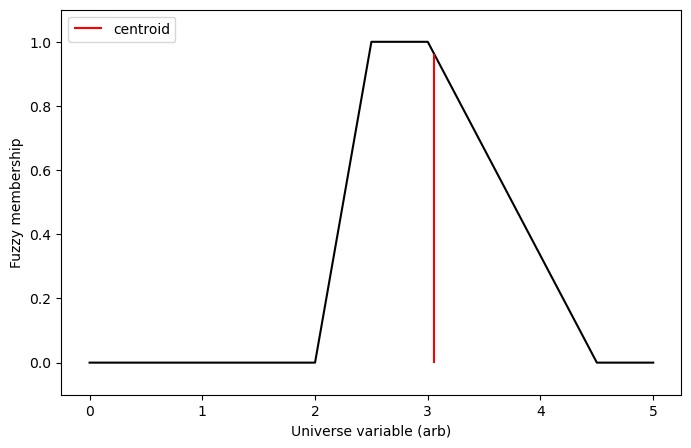

In [10]:
# Centroid defuzzification for centroid

import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz


# Generate trapezoidal membership function on range [0, 1]
x = np.arange(0, 5.05, 0.1)
mfx = fuzz.trapmf(x, [2, 2.5, 3, 4.5])

# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')  # Same as skfuzzy.centroid

# Collect info for vertical lines
labels = ['centroid']
xvals = [defuzz_centroid]
colors = ['r']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))

plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()

## Fuzzy Logic Code to tip at a restaurant

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

D:\Anaconda\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


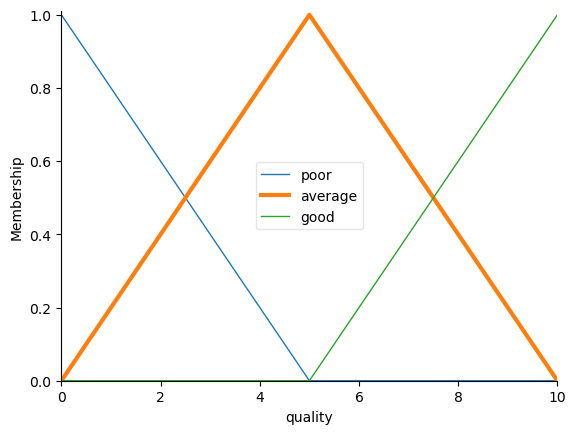

In [12]:
# You can see how these look with .view()
quality['average'].view()

D:\Anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


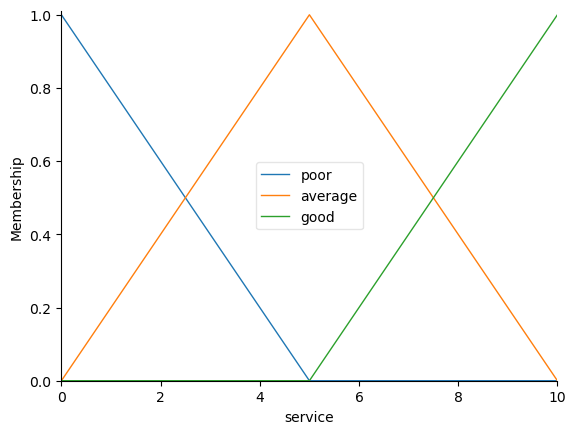

In [13]:
service.view()

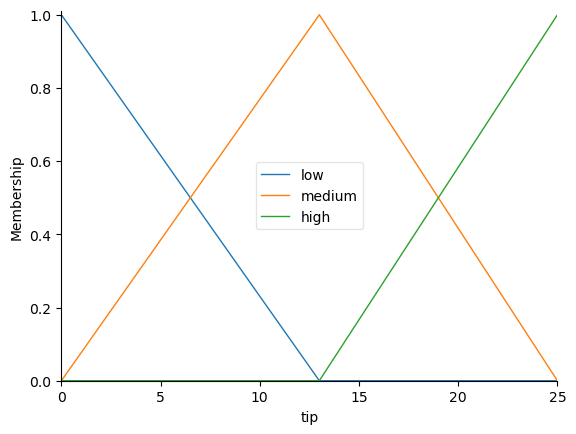

In [14]:
tip.view()

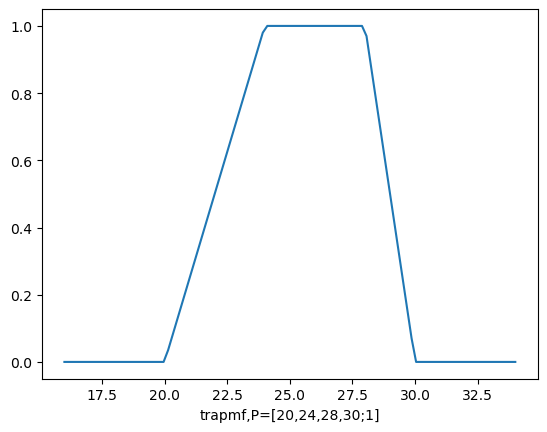

In [15]:
import numpy as np
from matplotlib.pyplot import *
from fuzzylab import *
x=np.linspace(16,34,101)
y=trapmf(x,[20,24,28,30])
plot(x,y)
xlabel('trapmf,P=[20,24,28,30;1]')
show()

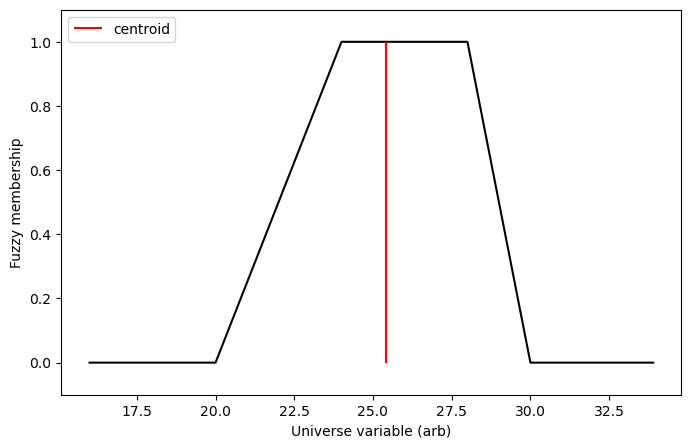

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
# Generate trapezoidal membership function on range [0, 1]
x = np.arange(16, 34, 0.1)
mfx = fuzz.trapmf(x, [20,24,28,30])

# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')  # Same as skfuzzy.centroid

# Collect info for vertical lines
labels = ['centroid']
xvals = [defuzz_centroid]
colors = ['r']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))

plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()